In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

import warnings
warnings.filterwarnings('ignore')

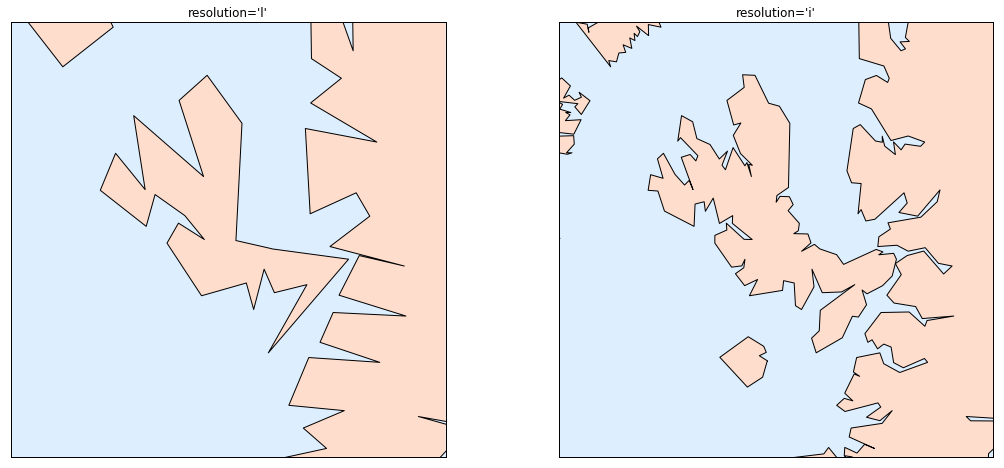

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
for i, res in enumerate(['l', 'i']):
    ax[i].get_axis_bgcolor = lambda: '#FFDDCC'
    m = Basemap(projection='gnom', lat_0=57.3, lon_0=-6.2,
                width=120000, height=120000, resolution=res, ax=ax[i])
    m.fillcontinents(color='#FFDDCC', lake_color='#DDEEFF')
    m.drawmapboundary(fill_color='#DDEEFF')
    m.drawcoastlines()
    ax[i].set_title("resolution='{0}'".format(res));

In [10]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')
# Extract the data we're interested in
lat = cities['latd'].values
lon = cities['longd'].values
population = cities['population_total'].values
area = cities['area_total_km2'].values

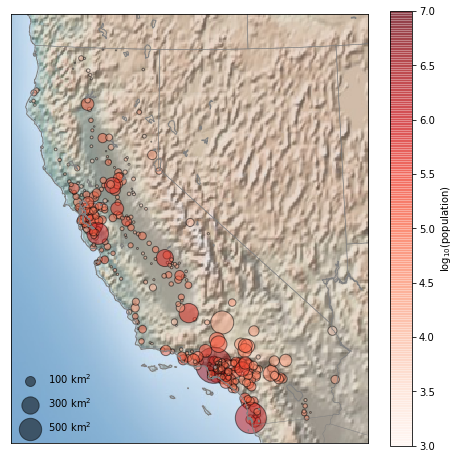

In [18]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='l',
            lat_0=37.5, lon_0=-119,
            width=10E5, height=12E5)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
m.scatter(lon, lat, latlon=True, edgecolor='k',
          c=np.log10(population), s=area,
          cmap='Reds', alpha=0.5)

plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

In [21]:
!wget -O data/gistemp250.nc.gz http://data.giss.nasa.gov/pub/gistemp/gistemp250.nc.gz
!gunzip data/gistemp250.nc.gz

--2018-07-31 15:04:39--  http://data.giss.nasa.gov/pub/gistemp/gistemp250.nc.gz
Resolving data.giss.nasa.gov (data.giss.nasa.gov)... 129.164.128.233, 2001:4d0:2310:230::233
Connecting to data.giss.nasa.gov (data.giss.nasa.gov)|129.164.128.233|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://data.giss.nasa.gov/pub/gistemp/gistemp250.nc.gz [following]
--2018-07-31 15:04:40--  https://data.giss.nasa.gov/pub/gistemp/gistemp250.nc.gz
Connecting to data.giss.nasa.gov (data.giss.nasa.gov)|129.164.128.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9509504 (9,1M) [application/x-gzip]
Saving to: ‘data/gistemp250.nc.gz’

data/gistemp250.nc. 100%[===================>]   9,07M  2,83MB/s    in 3,2s    

2018-07-31 15:04:43 (2,83 MB/s) - ‘data/gistemp250.nc.gz’ saved [9509504/9509504]



In [4]:
from netCDF4 import Dataset
data = Dataset('data/gistemp250.nc')

In [5]:
from netCDF4 import date2index
from datetime import datetime
timeindex = date2index(datetime(2014, 1, 15),
                       data.variables['time'])

In [8]:
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
lon, lat = np.meshgrid(lon, lat)
temp_anomaly = data.variables['tempanomaly'][timeindex]

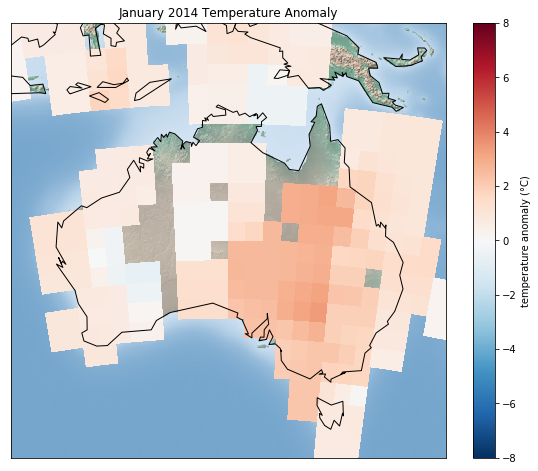

In [20]:
fig = plt.figure(figsize=(10, 8))
m = Basemap(projection='lcc', resolution='c',
            width=5E6, height=5E6,
            lat_0=-25, lon_0=133)
m.shadedrelief(scale=0.5)
m.pcolormesh(lon, lat, temp_anomaly,
             latlon=True, cmap='RdBu_r')
plt.clim(-8, 8)
m.drawcoastlines(color='black')
plt.title('January 2014 Temperature Anomaly')
plt.colorbar(label='temperature anomaly (°C)');